In [1]:
import matplotlib.pyplot as plt
import torch

# Workflow
- 1: data (prepare and load)

- 2: build model

- 3: fitting the model to data (training model)

- 4: made predictions, evaluate a model (make an inference)

- 5: save and load a model

- 6: put all together

# 1. Data (single input dim linear regression)

In [2]:
# known parameters, we are trying to get these

weight = 0.7
bias = 0.3

# inputs
X = torch.arange(0, 10, 0.2)
Y = weight * X + bias
X, Y

(tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
         1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000, 3.0000, 3.2000, 3.4000,
         3.6000, 3.8000, 4.0000, 4.2000, 4.4000, 4.6000, 4.8000, 5.0000, 5.2000,
         5.4000, 5.6000, 5.8000, 6.0000, 6.2000, 6.4000, 6.6000, 6.8000, 7.0000,
         7.2000, 7.4000, 7.6000, 7.8000, 8.0000, 8.2000, 8.4000, 8.6000, 8.8000,
         9.0000, 9.2000, 9.4000, 9.6000, 9.8000]),
 tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
         1.5600, 1.7000, 1.8400, 1.9800, 2.1200, 2.2600, 2.4000, 2.5400, 2.6800,
         2.8200, 2.9600, 3.1000, 3.2400, 3.3800, 3.5200, 3.6600, 3.8000, 3.9400,
         4.0800, 4.2200, 4.3600, 4.5000, 4.6400, 4.7800, 4.9200, 5.0600, 5.2000,
         5.3400, 5.4800, 5.6200, 5.7600, 5.9000, 6.0400, 6.1800, 6.3200, 6.4600,
         6.6000, 6.7400, 6.8800, 7.0200, 7.1600]))

In [3]:
#train and test splits
length = len(X)
split = int(len(X) * 0.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(X_train, Y_train, X_test, Y_test)
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000, 3.0000, 3.2000, 3.4000,
        3.6000, 3.8000, 4.0000, 4.2000, 4.4000, 4.6000, 4.8000, 5.0000, 5.2000,
        5.4000, 5.6000, 5.8000, 6.0000, 6.2000, 6.4000, 6.6000, 6.8000, 7.0000,
        7.2000, 7.4000, 7.6000, 7.8000]) tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
        1.5600, 1.7000, 1.8400, 1.9800, 2.1200, 2.2600, 2.4000, 2.5400, 2.6800,
        2.8200, 2.9600, 3.1000, 3.2400, 3.3800, 3.5200, 3.6600, 3.8000, 3.9400,
        4.0800, 4.2200, 4.3600, 4.5000, 4.6400, 4.7800, 4.9200, 5.0600, 5.2000,
        5.3400, 5.4800, 5.6200, 5.7600]) tensor([8.0000, 8.2000, 8.4000, 8.6000, 8.8000, 9.0000, 9.2000, 9.4000, 9.6000,
        9.8000]) tensor([5.9000, 6.0400, 6.1800, 6.3200, 6.4600, 6.6000, 6.7400, 6.8800, 7.0200,
        7.1600])
40 40 10 10


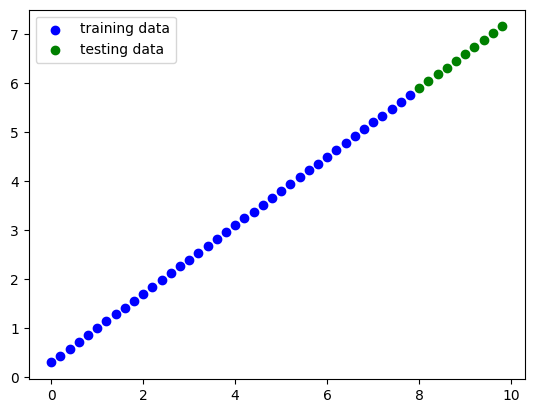

In [4]:
# Visualize data

def visualize(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, c='blue', label='training data')
    plt.scatter(X_test, Y_test, c='green', label='testing data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c='red', label='predictions')
    
    plt.legend()

visualize()

rand_weight: tensor([0.7527])
rand_bias: tensor([0.0112])


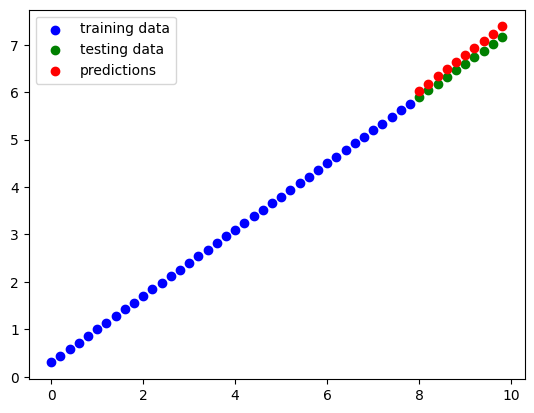

In [5]:
#plot predictions w/ random weight, bias
rand_weight = torch.rand(size=[1])
rand_bias = torch.rand(size=[1])
print(f'rand_weight: {rand_weight}')
print(f'rand_bias: {rand_bias}')

predictions = rand_weight * X_test + rand_bias

visualize(predictions=predictions)

# 2. Build model

In [6]:
torch.rand(2, 2)

tensor([[0.2350, 0.2347],
        [0.3353, 0.4537]])

In [7]:
from torch import nn

In [8]:
#Single Linear Regression Model

class SingleLinearRegressionModel(nn.Module): ## all models/neural networks inherit from nn.Module
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))  
        #requires_grad means you can change this parameter through gradient descent
    
    def forward(self, X) -> torch.Tensor:       #When using nn.Parameter, must override the forward() method
        return self.weights * X + self.bias


In [9]:
SEED = 42
torch.manual_seed(seed=SEED)

model = SingleLinearRegressionModel()
print(model)
print(list(model.parameters()))

state_dict = dict(model.state_dict())

SingleLinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


False


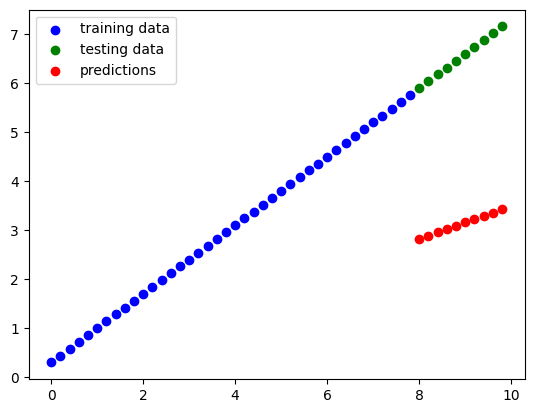

In [10]:
#Test w/ model's current parameters
#MAKE inferences with torch.inference_mode

with torch.inference_mode(): #in inference mode, machine doesn't need resources such as requires_grad
    preds = model(X_test)
print(preds.requires_grad)
visualize(predictions=preds)

# 3. Train Model

move from unknown parameters (ours are random rn), to known parameters

from a poor representation of data to a more accurate representation of the data

Need to get loss function in order to use gradient descent to minimize the loss function

loss function/cost function/criterion

Train:
* **Loss Function:** funciton to measure inaccuracy of your model's outputs (from Torch.nn's loss functions)
* **Optimizer:** Adjusts the model's parameters to minimize loss function

**Learning Rate:**
*THe smaller the learning rate, the smaller the changes in the model parameters, (changes are more precise)
*The bigger the learning rate, the less precise the changes in the model parameters. Larger changes in parameters

Our current model only has 2 parameters, one weight and one bias


for pytorch:
* Training Loop
* Testing Loop

In [11]:
print(model.parameters())
print(model.state_dict())

<generator object Module.parameters at 0x7f2ec8e7c660>
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)

loss_function, optimizer

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [32]:
#Training loop
EPOCHS = 1001

train_loss_values = []
test_loss_values = []
epoch_count = []



for epoch in range(EPOCHS):

    #put model in training model
    model.train()

    #1. Forward pass on training dataset using forward() (forward propogation)
    y_pred = model(X_train) 

    #2. Calculate Loss function after forward pass
    loss = loss_function(Y_train, y_pred)

    #3. Zero the gradients of the model, because the gradients accululate over time
    optimizer.zero_grad()

    #4. Backpropogation on loss
    loss.backward()

    #5. Progress/step optimizer (gradient descent) UPDATE model's parameters WRT gradients calculated with loss.backward()
    optimizer.step()


    #Testing Loop

    #1. make model go to evaluation mode (switch off default train mode)
    model.eval() 

    #2. Set up torch.inference_mode() context manager
    with torch.inference_mode():
        if epoch % 10 == 0:
            train_pred = model(X_train)
            test_pred = model(X_test)

            train_loss = loss_function(train_pred, Y_train)
            test_loss = loss_function(test_pred, Y_test)

            train_loss_values.append(train_loss)
            test_loss_values.append(test_loss)
            epoch_count.append(epoch)

            print(f'Epoch: {epoch} | train loss: {train_loss} | test loss: {test_loss}')
    

Epoch: 0 | train loss: 3.66924905392807e-05 | test loss: 7.317514246096835e-05
Epoch: 10 | train loss: 3.632670996012166e-05 | test loss: 7.245613960549235e-05
Epoch: 20 | train loss: 3.5964709240943193e-05 | test loss: 7.173905032686889e-05
Epoch: 30 | train loss: 3.5606401070253924e-05 | test loss: 7.101913070073351e-05
Epoch: 40 | train loss: 3.5251756344223395e-05 | test loss: 7.030121923889965e-05
Epoch: 50 | train loss: 3.49006186297629e-05 | test loss: 6.958159792702645e-05
Epoch: 60 | train loss: 3.455238766036928e-05 | test loss: 6.885545735713094e-05
Epoch: 70 | train loss: 3.4208129363832995e-05 | test loss: 6.816061068093404e-05
Epoch: 80 | train loss: 3.386679964023642e-05 | test loss: 6.749666499672458e-05
Epoch: 90 | train loss: 3.353018109919503e-05 | test loss: 6.684305844828486e-05
Epoch: 100 | train loss: 3.319598181406036e-05 | test loss: 6.61948142806068e-05
Epoch: 110 | train loss: 3.2865151297301054e-05 | test loss: 6.555492291226983e-05
Epoch: 120 | train loss: 

TypeError: 'str' object is not callable

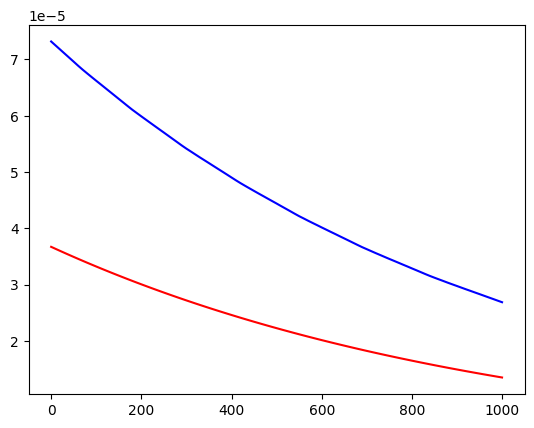

In [44]:
plt.plot(epoch_count, train_loss_values, c='red', label="train loss")
plt.plot(epoch_count, test_loss_values, c='blue', label="test loss values")
plt.xlabel('epochs')
plt.ylabel("Loss")  
plt.title("Training and testing loss curves")

plt.legend()
# print(model.state_dict())

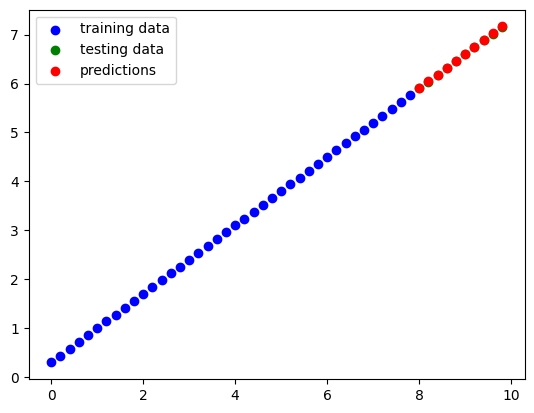

In [34]:
with torch.inference_mode():
    y_preds = model(X_test)
    visualize(predictions=y_preds)

# Saving and loading model

- torch.save() - save python obj through the pickle binary serialization
- torch.load() - load python obj through pickle library binary deserialization
- torch.nn.Module.save_state_dict() - saves the state dict of a model

In [35]:
import os
os.makedirs("models", exist_ok=True)


In [36]:
save_path = os.path.join("models", "001-torch_workflow-SingleLinRegModel.pth")
torch.save(obj=model.state_dict(), f=save_path)

In [37]:
loaded_model = SingleLinearRegressionModel()
loaded_model.load_state_dict(torch.load(save_path))
loaded_model.state_dict()

/tmp/ipykernel_7404/647286469.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(save_path))


OrderedDict([('weights', tensor([0.7014])), ('bias', tensor([0.2928]))])

In [39]:
original_preds = model(X_test)
loaded_model_preds = loaded_model(X_test)

print(original_preds == loaded_model_preds)
print(model.state_dict())
print(loaded_model.state_dict())

tensor([True, True, True, True, True, True, True, True, True, True])
OrderedDict([('weights', tensor([0.7014])), ('bias', tensor([0.2928]))])
OrderedDict([('weights', tensor([0.7014])), ('bias', tensor([0.2928]))])
